In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [166]:
df = pd.read_csv('sales_predictions.csv')

In [167]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [168]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [169]:
df.duplicated().sum()

0

In [170]:
def Upgrade_Item_Identifier_mean(Item_Identifier):
  Item_Identifier_filter  = df['Item_Identifier'] == Item_Identifier
  values_mean = df[Item_Identifier_filter]['Item_Weight'].mean()
  return values_mean


Item_Weight_filter_isna = df['Item_Weight'].isna()

df.loc[Item_Weight_filter_isna , 'Item_Weight'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['Item_Identifier']) ,axis=1 )
df[Item_Weight_filter_isna]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [171]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [173]:

grouped_df=df.groupby('Outlet_Identifier')

In [174]:
(grouped_df.first())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,,
OUT010,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,None,Tier 3,Grocery Store,732.3800
OUT013,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
OUT017,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,2007,None,Tier 2,Supermarket Type1,4710.5350
OUT018,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
OUT019,FDC37,15.50,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,Tier 1,Grocery Store,214.3876
OUT027,FDP10,19.00,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
OUT035,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,2004,Small,Tier 2,Supermarket Type1,2748.4224
OUT045,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,None,Tier 2,Supermarket Type1,1076.5986
OUT046,FDA03,18.50,Regular,0.045464,Dairy,144.1102,1997,Small,Tier 1,Supermarket Type1,2187.1530


Me doy cuenta de que los valores nulos son propios, y que por tanto, no voy a poder reemplazar porque simplemente dice none. Sin embargo, voy a usar un modelo predictivo knn para determinar cual debería ser su tipo de tienda. 

In [175]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [176]:
df1=df.copy()

In [177]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [178]:

df['Outlet_Location_Type']=df.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

df['Outlet_Type']= df.Outlet_Type.map({'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4})

In [179]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,4,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,2,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,3,1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,2,1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,3,4,1845.5976


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [181]:
df2=df[['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [182]:
df2

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,1,1,3735.1380
1,OUT018,2009,Medium,3,4,443.4228
2,OUT049,1999,Medium,1,1,2097.2700
3,OUT010,1998,NaN,3,2,732.3800
4,OUT013,1987,High,3,1,994.7052
...,...,...,...,...,...,...
8518,OUT013,1987,High,3,1,2778.3834
8519,OUT045,2002,NaN,2,1,549.2850
8520,OUT035,2004,Small,2,1,1193.1136
8521,OUT018,2009,Medium,3,4,1845.5976


In [183]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [184]:
df2.dropna()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,1,1,3735.1380
1,OUT018,2009,Medium,3,4,443.4228
2,OUT049,1999,Medium,1,1,2097.2700
4,OUT013,1987,High,3,1,994.7052
5,OUT018,2009,Medium,3,4,556.6088
...,...,...,...,...,...,...
8517,OUT046,1997,Small,1,1,3608.6360
8518,OUT013,1987,High,3,1,2778.3834
8520,OUT035,2004,Small,2,1,1193.1136
8521,OUT018,2009,Medium,3,4,1845.5976


In [185]:
df2.corr().sort_values(by = ['Item_Outlet_Sales'])

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Establishment_Year,1.000000,-0.089216,0.005559,-0.049135
Outlet_Type,0.005559,0.557050,1.000000,0.020871
Outlet_Location_Type,-0.089216,1.000000,0.557050,0.089367
Item_Outlet_Sales,-0.049135,0.089367,0.020871,1.000000


In [186]:
df2.dropna()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,1,1,3735.1380
1,OUT018,2009,Medium,3,4,443.4228
2,OUT049,1999,Medium,1,1,2097.2700
4,OUT013,1987,High,3,1,994.7052
5,OUT018,2009,Medium,3,4,556.6088
...,...,...,...,...,...,...
8517,OUT046,1997,Small,1,1,3608.6360
8518,OUT013,1987,High,3,1,2778.3834
8520,OUT035,2004,Small,2,1,1193.1136
8521,OUT018,2009,Medium,3,4,1845.5976


In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Outlet_Identifier          8523 non-null   object 
 1   Outlet_Establishment_Year  8523 non-null   int64  
 2   Outlet_Size                6113 non-null   object 
 3   Outlet_Location_Type       8523 non-null   int64  
 4   Outlet_Type                8523 non-null   int64  
 5   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 399.6+ KB


In [188]:
test_data=df.dropna(['Outlet_Size'])

C:\Users\nicol\AppData\Local\Temp/ipykernel_8040/893574874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  test_data=df.dropna(['Outlet_Size'])


TypeError: supplying multiple axes to axis is no longer supported.

In [ ]:
df2 = df2.dropna(how='any')

In [ ]:
df2['Outlet_Size'].dropna()

In [ ]:
X = df2[['Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Type']]
y= df2[['Outlet_Size']].dropna()


In [ ]:
y

In [137]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [138]:
knn_class=  KNeighborsClassifier()

In [139]:
knn_class.fit(X,y)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [140]:
knn_class.score(X,y)

1.0

In [144]:
outlet_size=knn_class.predict(X)

In [162]:
knn_class.predict(X)

array(['Medium', 'Medium', 'Medium', ..., 'Small', 'Medium', 'Small'],
      dtype=object)

In [191]:
df2= df[['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

<AxesSubplot:>

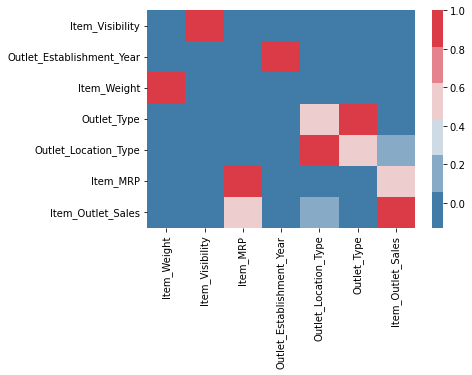

In [192]:
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10))

La variable con una correlación más fuerte es la MRP que significa el precio minorista máximo, es decir, que un mayor precio máximo se correlaciona con mayores ganancias. También la locación es influyente pero no con la fuerza de la otra correlación.  

In [195]:
X = df[['Item_MRP','Outlet_Location_Type']]
y= df[['Item_Outlet_Sales']]


In [196]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [197]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(X,y)

KNeighborsRegressor()

In [199]:
prediccion_ventas = knn_reg.predict(X)

In [200]:
prediccion_ventas

array([[3587.9962 ],
       [ 624.38724],
       [1586.86772],
       ...,
       [1372.8796 ],
       [1359.82992],
       [ 771.12956]])

In [201]:
knn_reg.score(X,y)

0.4666353145540513

El poder predictivo es relativamente débil porque es casi tan probable acertar como errar. Voy a intentar con el sklearn.

In [204]:
reg = LinearRegression(fit_intercept=True)

In [205]:
reg.fit(X,y)

LinearRegression()

In [207]:
reg.predict(X)

array([[3665.14230691],
       [ 905.42327218],
       [1982.50345863],
       ...,
       [1291.2195872 ],
       [1758.69320331],
       [ 953.69295969]])

In [209]:
 reg.score(X, y)


0.33010362971376117

El poder predictivo del modelo de knn resulto ser más fiable que el logrado con scikit-learn.